In [13]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.signal import get_window
from scipy.io.wavfile import read
import IPython.display as ipd

In [18]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 4))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()

def display_spectrum_dft(sound_array, fft_size=512, sampling_rate=44100):
  """ Compute and display the magnitude spectrum of a sound
    Args:
      sound_array (numpy.array): Array of samples
      fft_size (int): Size of the FFT
      sampling_rate (int): Sampling rate
  """
  window = 'hamming'
  spectrum = fft(sound_array[:fft_size] * get_window(window, fft_size))
  magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
  plt.figure(1, figsize=(10, 4))
  plt.plot(magnitude_spectrum)
  plt.xlabel('bins')
  plt.ylabel('amplitude (dB)')
  plt.title('magnitude spectrum')
  plt.show()

def display_spectrogram_stft(sound_array, fft_size=512, sampling_rate=44100):
  """ Compute and display the spectrogram of a sound
    Args:
      sound_array (numpy.array): Array of samples
      fft_size (int): Size of the FFT
      sampling_rate (int): Sampling rate
  """
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  window = 'hamming'
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(sound_array[sample_index:sample_index+fft_size] * get_window(window, fft_size))
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += fft_size//2

  # plot the magnitude spectrogram
  plt.figure(figsize=(10, 5))
  plt.pcolormesh(np.transpose(magnitude_spectrogram), shading='auto', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('frames')
  plt.ylabel('bins')
  plt.show()

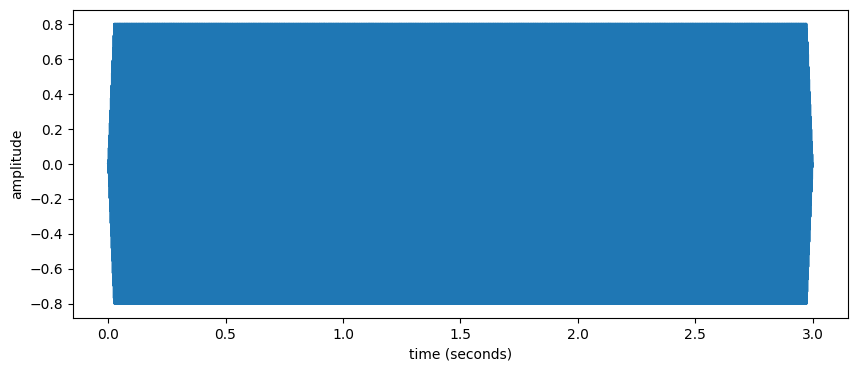

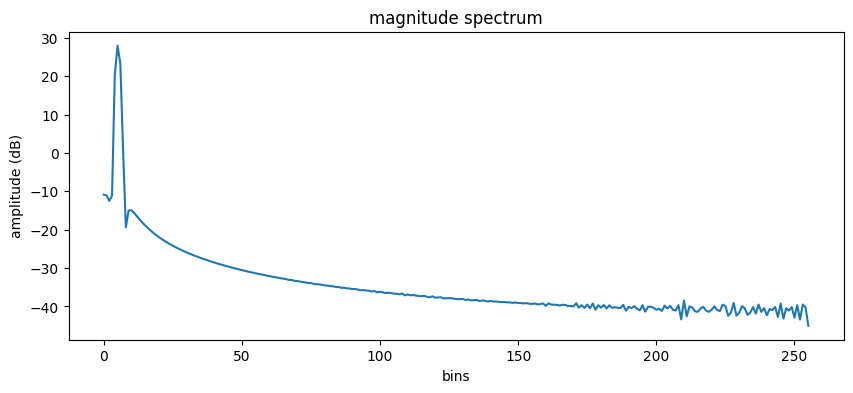

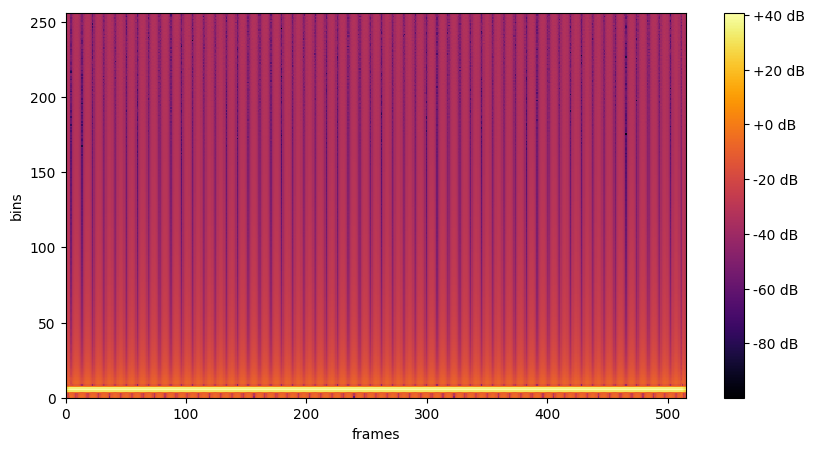

In [19]:
x, fs = read_sound('sounds/sinewave.wav')
display_sound(x, fs)  # play the sound
ipd.display(ipd.Audio(data=x, rate=fs))
display_spectrum_dft(x, 512, fs)
display_spectrogram_stft(x, 512, 1)

**Tasks**

1. Choose another sound from sound directory
2. Describe the characteristics of the sound
3. Compute and plot the spectrum of different parts of the sound and explain the differences. Choose different values of the fft_size to find the most appropriate one.